In [117]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# 先用均匀采样得到一个结果
N = 10000 # MC模拟次数
d_max = 20
d = np.arange(2,d_max+1)

np.random.seed(1432)

def GetNdUnitSphereVolume(d):
    '''解析的得到N维度单位球的体积'''
    if d%2 == 1:
        result = 1
        for i in range(d-2, 0, -2):  
            result *= i
        
        V = (2**(0.5*(d+1))*np.pi**(0.5*(d-1)))/(d*result)
    if d%2 == 0:
        #先算二级阶乘的结果
        result = math.factorial(int(0.5*d - 1))
        V = 2*np.pi**(0.5*d)/(d*result)
    return V


def MC(d):
    '''使用Monte Carlo计算d维单位球体积'''
    points = np.zeros((d,N))
    for i in range(d):
        points[i:,] = np.random.uniform(0,1,N)
        
    count = 0 

    for j in range(N):
        if np.sum(points[:,j]**2) <= 1:
            count += 1

    V = count/N * 2**(d)
    return V

for i in range(len(d)):
    V = GetNdUnitSphereVolume(d[i])
    V_MC = MC(d[i])
    eta = (V_MC-V)/V
    print(f"{d[i]}维度下的标准球，体积为{V:.4f},MonteCarlo得到结果为{V_MC},相对误差为{eta:.4f}")

2维度下的标准球，体积为3.1416,MonteCarlo得到结果为3.162,相对误差为0.0065
3维度下的标准球，体积为4.1888,MonteCarlo得到结果为4.244,相对误差为0.0132
4维度下的标准球，体积为4.9348,MonteCarlo得到结果为4.9808,相对误差为0.0093
5维度下的标准球，体积为5.2638,MonteCarlo得到结果为5.2288,相对误差为-0.0066
6维度下的标准球，体积为5.1677,MonteCarlo得到结果为5.1648,相对误差为-0.0006
7维度下的标准球，体积为4.7248,MonteCarlo得到结果为4.3648,相对误差为-0.0762
8维度下的标准球，体积为4.0587,MonteCarlo得到结果为3.8912,相对误差为-0.0413
9维度下的标准球，体积为3.2985,MonteCarlo得到结果为2.816,相对误差为-0.1463
10维度下的标准球，体积为2.5502,MonteCarlo得到结果为2.4576,相对误差为-0.0363
11维度下的标准球，体积为1.8841,MonteCarlo得到结果为2.048,相对误差为0.0870
12维度下的标准球，体积为1.3353,MonteCarlo得到结果为1.2288,相对误差为-0.0797
13维度下的标准球，体积为0.9106,MonteCarlo得到结果为0.0,相对误差为-1.0000
14维度下的标准球，体积为0.5993,MonteCarlo得到结果为0.0,相对误差为-1.0000
15维度下的标准球，体积为0.3814,MonteCarlo得到结果为0.0,相对误差为-1.0000
16维度下的标准球，体积为0.2353,MonteCarlo得到结果为0.0,相对误差为-1.0000
17维度下的标准球，体积为0.1410,MonteCarlo得到结果为0.0,相对误差为-1.0000
18维度下的标准球，体积为0.0821,MonteCarlo得到结果为0.0,相对误差为-1.0000
19维度下的标准球，体积为0.0466,MonteCarlo得到结果为0.0,相对误差为-1.0000
20维度下的标准球，体积为0.0258,MonteCarlo得到结果为0.0,相对误差为-1.

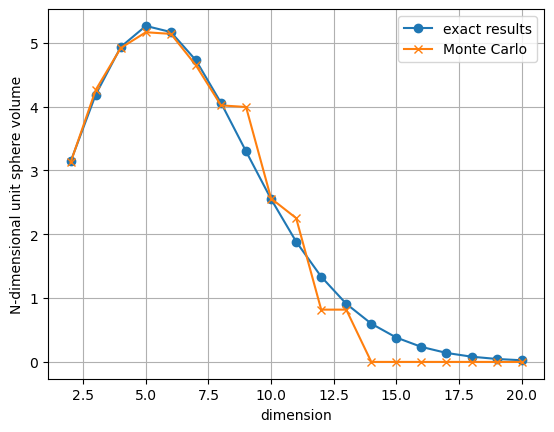

In [119]:
plt.figure()
V = np.array([])
V_MC = np.array([])
for i in range(len(d)):
    V = np.append(V,GetNdUnitSphereVolume(d[i]))
    V_MC = np.append(V_MC,MC(d[i]))
    
plt.plot(d,V,label = 'exact results',marker = 'o')
plt.plot(d,V_MC,label = 'Monte Carlo',marker = 'x')

plt.xlabel('dimension')
plt.ylabel('N-dimensional unit sphere volume')

plt.grid()

plt.legend()
plt.show()

c:\Users\ASUS\anaconda3\envs\ComputationalPhysics\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ASUS\anaconda3\envs\ComputationalPhysics\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


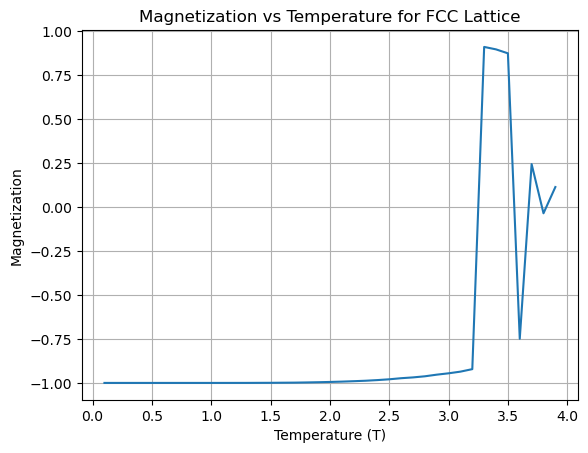

In [120]:
# Parameters
L = 4  # Lattice size (4x4x4 FCC lattice for simplicity)
J = 1  # Interaction strength (ferromagnetic)
T_min = 0.1  # Minimum temperature
T_max = 4.0  # Maximum temperature
T_step = 0.1  # Temperature step
n_steps = 10000  # MC steps per temperature
equil_steps = 5000  # Equilibration steps

# Create FCC lattice in 3D with periodic boundary conditions
def create_fcc_lattice(L):
    lattice = np.zeros((L, L, L), dtype=complex)
    for x in range(L):
        for y in range(L):
            for z in range(L):
                lattice[x, y, z] = np.random.choice([1, -1])  # Random spin (+1 or -1)
    return lattice

# Function to compute the energy of a given configuration
def calc_energy(lattice, J):
    energy = 0.0
    L = lattice.shape[0]
    for x in range(L):
        for y in range(L):
            for z in range(L):
                for dx, dy, dz in [(1, 0, 0), (0, 1, 0), (0, 0, 1), (-1, 0, 0), (0, -1, 0), (0, 0, -1)]:
                    nx, ny, nz = (x + dx) % L, (y + dy) % L, (z + dz) % L
                    energy -= J * lattice[x, y, z] * lattice[nx, ny, nz]
    return energy / 2.0  # Each pair is counted twice

# Function to perform a single MC sweep (Metropolis algorithm)
def mc_sweep(lattice, T, J):
    L = lattice.shape[0]
    for _ in range(L**3):
        x, y, z = np.random.randint(0, L), np.random.randint(0, L), np.random.randint(0, L)
        spin = lattice[x, y, z]
        dE = 0
        for dx, dy, dz in [(1, 0, 0), (0, 1, 0), (0, 0, 1), (-1, 0, 0), (0, -1, 0), (0, 0, -1)]:
            nx, ny, nz = (x + dx) % L, (y + dy) % L, (z + dz) % L
            dE += 2 * J * spin * lattice[nx, ny, nz]
        
        if dE < 0 or random.random() < np.exp(-dE / T):
            lattice[x, y, z] = -spin

# Function to estimate magnetization
def calc_magnetization(lattice):
    return np.sum(lattice) / (lattice.shape[0] ** 3)

# Function to run the MC simulation and estimate Curie temperature
def run_mc_simulation(L, J, T_min, T_max, T_step, n_steps, equil_steps):
    lattice = create_fcc_lattice(L)
    temperatures = np.arange(T_min, T_max, T_step)
    magnetizations = []

    for T in temperatures:
        # Equilibrate the system
        for _ in range(equil_steps):
            mc_sweep(lattice, T, J)

        # Collect data for magnetization
        m_vals = []
        for _ in range(n_steps):
            mc_sweep(lattice, T, J)
            m_vals.append(calc_magnetization(lattice))
        magnetizations.append(np.mean(m_vals))
    
    # Plot results
    plt.plot(temperatures, magnetizations, label="Magnetization")
    plt.xlabel('Temperature (T)')
    plt.ylabel('Magnetization')
    plt.title('Magnetization vs Temperature for FCC Lattice')
    plt.grid(True)
    plt.show()

# Run the simulation
run_mc_simulation(L, J, T_min, T_max, T_step, n_steps, equil_steps)
